<a href="https://colab.research.google.com/github/21anirudh/DA/blob/main/ML/Regression/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLR using Least Squares Method

Coefficients (Intercept, b1, b2): [-0.5 -1.   3. ]
Predicted values: [ 1.5  6.5  8.5 13.5]
SSE: 1.0
MSE: 0.25
RMSE: 0.5
MAE: 0.5
R^2: 0.9866666666666667
Adjusted R^2: 0.9600000000000001


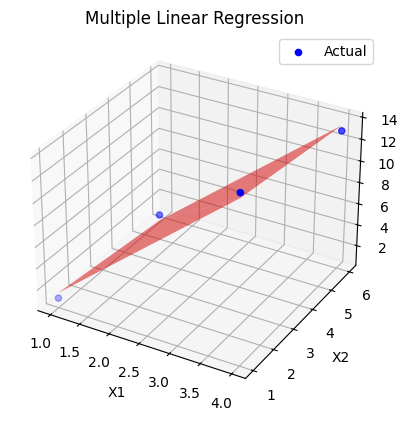

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate coefficients using Least Squares Method
def least_squares(X, y):
    # Adding a column of ones for the intercept term (bias)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Adding bias term
    # Using the normal equation: beta = (X^T * X)^(-1) * X^T * y
    beta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return beta

# Function to predict y values based on the model coefficients
def predict(X, beta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Adding bias term for predictions
    return X_b.dot(beta)

# Function to calculate error metrics
def calculate_error_metrics(y, y_pred, X):
    residuals = y - y_pred
    SSE = np.sum(residuals ** 2)
    MSE = SSE / len(y)
    RMSE = np.sqrt(MSE)
    MAE = np.mean(np.abs(residuals))
    R2 = 1 - (SSE / np.sum((y - np.mean(y)) ** 2))
    R2_adj = 1 - (1 - R2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

    print(f"SSE: {SSE}")
    print(f"MSE: {MSE}")
    print(f"RMSE: {RMSE}")
    print(f"MAE: {MAE}")
    print(f"R^2: {R2}")
    print(f"Adjusted R^2: {R2_adj}")

# Sample data with 2 features (X1, X2) and target variable (y)
X = np.array([[1, 1],
              [2, 3],
              [3, 4],
              [4, 6]])

y = np.array([1, 7, 9, 13])

# Solve for coefficients using least squares
beta = least_squares(X, y)
print(f"Coefficients (Intercept, b1, b2): {beta}")

# Predict the target values
y_pred = predict(X, beta)
print(f"Predicted values: {y_pred}")

# Calculate error metrics
calculate_error_metrics(y, y_pred, X)

# Plotting the results
fig = plt.figure()

# For 2D input, we can use 3D plotting
if X.shape[1] == 2:
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Actual')
    ax.plot_trisurf(X[:, 0], X[:, 1], y_pred, color='red', alpha=0.5)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    plt.title('Multiple Linear Regression')
    plt.legend()
    plt.show()

# Variance Inflation Factor (VIF) to detect Multicollinearity

In [15]:
import statsmodels.api as sm
import pandas as pd

# Create sample data
data = {'X1': [1, 2, 3, 4],
        'X2': [100, 7, 4000, 5.1],
        'X3': [2.1, -4.1, 42, 5]}

df = pd.DataFrame(data)

# Regress X1 on X2 and X3
X = df[['X2', 'X3']]
X = sm.add_constant(X)  # Add intercept
y = df['X1']

# Fit the model
model = sm.OLS(y, X).fit()

# Get R^2 (R_i^2 for X1)
R1_squared = model.rsquared
print("R_1^2 for X1:", R1_squared)
VIF = 1/(1-R1_squared)
print("VIF for X1:", VIF)

R_1^2 for X1: 0.3802000152040288
VIF for X1: 1.6134237246378522


# Correlation Matrix to detect Multicollinearity

Correlation Matrix:
          X1        X2        X3
X1  1.000000  0.241567  0.339337
X2  0.241567  1.000000  0.983806
X3  0.339337  0.983806  1.000000


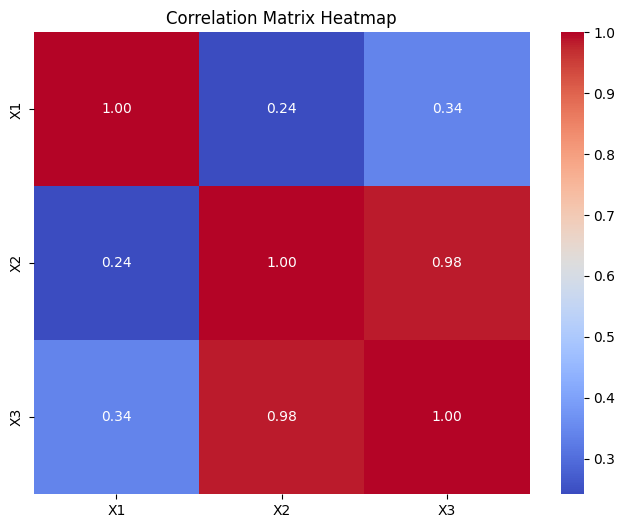

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create sample data
data = {'X1': [1, 2, 3, 4],
        'X2': [100, 7, 4000, 5.1],
        'X3': [2.1, -4.1, 42, 5]}

df = pd.DataFrame(data)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Plot a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# MLR using Gradient Descent Method

Optimal Coefficients: [-0.50105015 -0.99708025  2.99821066]
Cost after final iteration: 0.1250000821510015


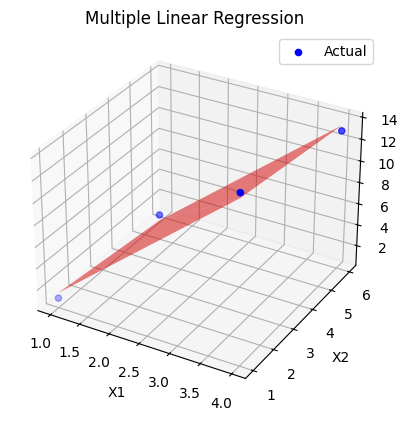

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to compute the cost (MSE)
def compute_cost(X, y, w):
    n = len(y)
    predictions = X.dot(w)
    cost = (1 / (2 * n)) * np.sum((predictions - y) ** 2)
    return cost

# Gradient Descent function
def gradient_descent(X, y, alpha, iterations):
    # Adding a column of ones for the intercept term (bias)
    X = np.c_[np.ones((X.shape[0], 1)), X]

    w = np.zeros(X.shape[1])
    n = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        predictions = X.dot(w)
        errors = predictions - y
        gradient = X.T.dot(errors) / n
        w = w - alpha * gradient
        cost_history[it] = compute_cost(X, y, w)

    return w, cost_history

# Sample data (n=4, 2 features)
X = np.array([[1, 1],
              [2, 3],
              [3, 4],
              [4, 6]])  # Add a column of ones for the intercept term
y = np.array([1, 7, 9, 13])

# Initialize parameters
w = np.zeros(X.shape[1])
alpha = 0.05  # Learning rate
iterations = 10000

# Perform gradient descent
w_optimal, cost_history = gradient_descent(X, y, alpha, iterations)

print(f"Optimal Coefficients: {w_optimal}")
print(f"Cost after final iteration: {cost_history[-1]}")

# Plotting the results
fig = plt.figure()

# For 2D input, we can use 3D plotting
if X.shape[1] == 2:
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Actual')
    ax.plot_trisurf(X[:, 0], X[:, 1], y_pred, color='red', alpha=0.5)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    plt.title('Multiple Linear Regression')
    plt.legend()
    plt.show()